In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("seaborn-v0_8")

# PCA
![Alt Text](./pca_procedure.png)

In [2]:
from sklearn.decomposition import PCA

In [3]:
# Load iris dataset from seaborn
iris = sns.load_dataset('iris')

In [4]:
# Separate features and labels
X = iris.drop(columns='species')

In [5]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


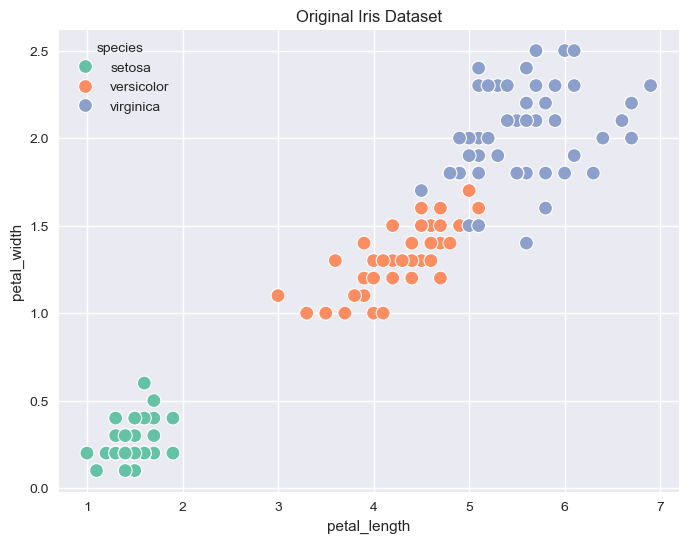

In [6]:
# Visualize the PCA result
plt.figure(figsize=(8, 6))
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species', palette='Set2', s=100)
plt.title('Original Iris Dataset')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.grid(True)
plt.show()

In [7]:
# Apply PCA to reduce the dimensionality to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.loc[:, ['petal_length',	'petal_width']])

In [8]:
# Create a DataFrame for the PCA result
iris_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
iris_pca['species'] = iris['species']

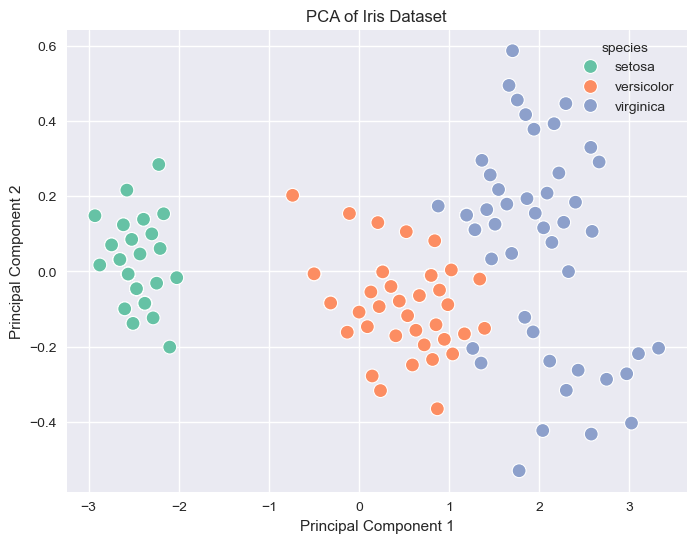

In [9]:
# Visualize the PCA result
plt.figure(figsize=(8, 6))
sns.scatterplot(data=iris_pca, x='PC1', y='PC2', hue='species', palette='Set2', s=100)
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [ ]:
df = pd.read_csv("./autos.csv")
df.head()

In [ ]:
features = ["highway_mpg", "engine_size", "horsepower", "curb_weight"]

X = df.copy()
y = X.pop('price')
X = X.loc[:, features]

In [ ]:
# Standardize
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)
# Technical note: PCA is typically applied to standardized data.

In [ ]:
# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

In [ ]:
X_pca.head()

In [ ]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)

In [ ]:
loadings